In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl as quandl
import numpy as np
import yfinance as yf
from pandas.plotting import autocorrelation_plot

In [237]:
# Gold data
gold_max = quandl.get("LBMA/GOLD", authtoken="dTFXFSLUvt2MiM3bWUQd")
gold_max['USD (AM)'].to_csv(r'C:\Users\Jayde\gold_max.csv')

In [238]:
# SnP500 data
data = yf.download("^GSPC", period='max', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [239]:
# Snp Frame 
snp_500_max = data
snp_500_close = pd.DataFrame(snp_500_max['Adj Close'])
#snp_500_close

In [240]:
#SnP Crash Frames
# NixonShock/OPEC Oil Embargo Jan 11, 1973 — Jul 17, 1980 90 months (1,899 days) -48% Drop
snp_500_nixon = snp_500_close['1973-1-11':'1980-7-17']
#snp_500_nixon
# Black Monday                Oct 13, 1987 — May 15, 1989 19 months (402 days) -29% Drop
snp_500_black = snp_500_close['1987-10-13': '1989-5-15']
#snp_500_black
# Dot Com Bubble              Mar 24, 2000 — May 30, 2007 86 months (1,808 days) -49%
snp_500_dot_com = snp_500_close['2000-3-10': '2007-5-30']
#snp_500_dot_com
# GFC                         Oct 9, 2007 — Mar 28, 2013 65 months (1,379 days) -57%
snp_500_gfc = snp_500_close['2007-10-9': '2013-3-28']
#snp_500_gfc
# Covid 19                    Feb 19, 2020 — Ongoing 5 months+ (117+ days) - 34%
snp_500_covid = snp_500_close['2020-2-19':]
#snp_500_covid

In [241]:
# Gold DF
gold_max = pd.read_csv(r'C:\Users\Jayde\gold_max.csv')
gold_max.head()
#gold_max['Date'] = gold_max['Date'].apply(pd.to_datetime).set_index
gold_max.set_index('Date', inplace=True)
gold_max.index = pd.to_datetime(gold_max.index)
#gold_max

In [242]:
#SnP Crash Frames
# NixonShock/OPEC Oil Embargo Jan 11, 1973 — Jul 17, 1980 90 months (1,899 days) -48% Drop
gold_max_nixon = gold_max['1973-1-11':'1980-7-17']
#gold_max_nixon
# Black Monday                Oct 13, 1987 — May 15, 1989 19 months (402 days) -29% Drop
gold_max_black = gold_max['1987-10-13': '1989-5-15']
#gold_max_black
# Dot Com Bubble              Mar 24, 2000 — May 30, 2007 86 months (1,808 days) -49%
gold_max_dot_com = gold_max['2000-3-10': '2007-5-30']
#gold_max_dot_com
# GFC                         Oct 9, 2007 — Mar 28, 2013 65 months (1,379 days) -57%
gold_max_gfc = gold_max['2007-10-9': '2013-3-28']
#gold_max_gfc
# Covid 19                    Feb 19, 2020 — Ongoing 5 months+ (117+ days) - 34%
gold_max_covid = gold_max['2020-2-19':]
#gold_max_covid

In [243]:
def daily_ror(snp_crash, gold_crash, title):
    snp = np.mean(snp_crash.pct_change())
    gold = np.mean(gold_crash.pct_change())
    # std df
    std_snp = np.std(snp_crash.pct_change())
    std_gold = np.std(gold_crash.pct_change())
    
    ror = pd.concat([snp, gold])
    std = pd.concat([std_snp, std_gold])
    
    fig, axs = plt.subplots(1,2, figsize=(10,6))
    
    fig.tight_layout(pad=5.0)
    
    plt.bar(['SNP','Gold'], ror)
    plt.title('Daily Mean Percentage Returns')
    plt.ylabel('Daily Mean Percentage')
    
    plt.subplot(1,2,1)
    plt.bar(['SNP','Gold'], std)
    plt.title('Standard Deviation')
    plt.ylabel('Daily Mean Standard Deviation')
    
    
    fig.suptitle(f'{title}', fontsize=14)

In [244]:
#autocorrelation bebes
def auto_corr(snp_crash, gold_crash, title):
    fig = plt.figure(figsize=(11,7))
    autocorrelation_plot(snp_crash)
    autocorrelation_plot(gold_crash)
    plt.xlabel('Period In Days Since Crash')
    plt.ylabel('+/- Correlation Strength to Self')
    plt.title(f'{title} SNP500(Blue) & GOLD(Orange) Autocorrelation Relative to Self', fontsize=14) 

In [245]:
snp_500_crash_list =  [snp_500_nixon, snp_500_black, snp_500_dot_com, snp_500_gfc, snp_500_covid]
gold_crash_list = [gold_max_nixon, gold_max_black, gold_max_dot_com, gold_max_gfc, gold_max_covid]
titles = ['Nixon Shock', 'Black Monday', 'Dot Com', 'GFC', 'Covid']

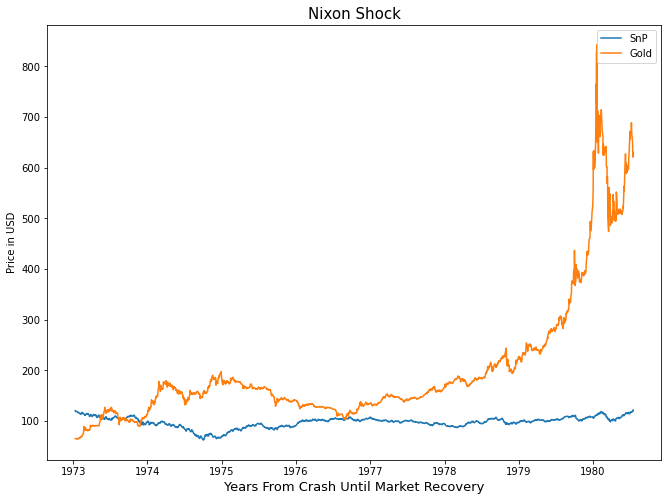

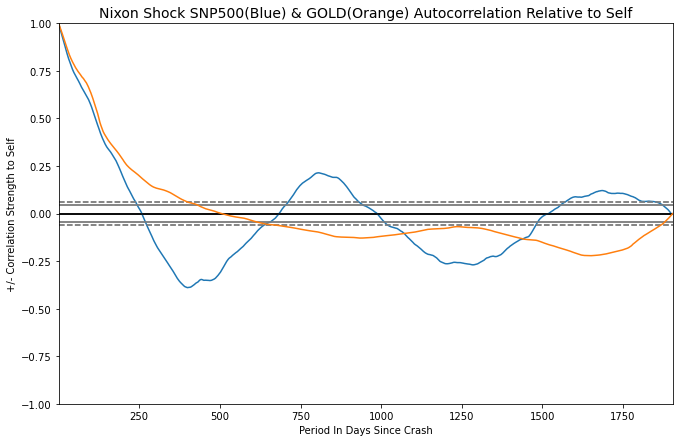

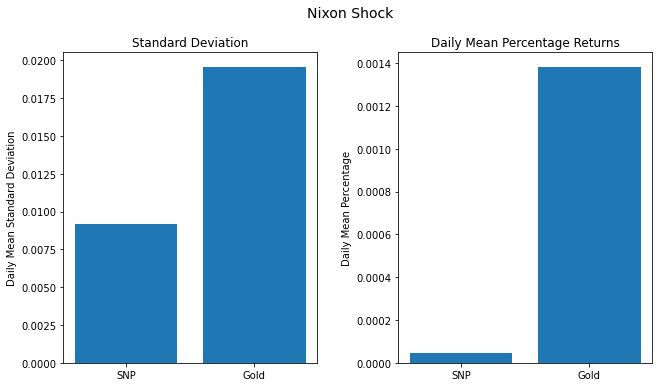

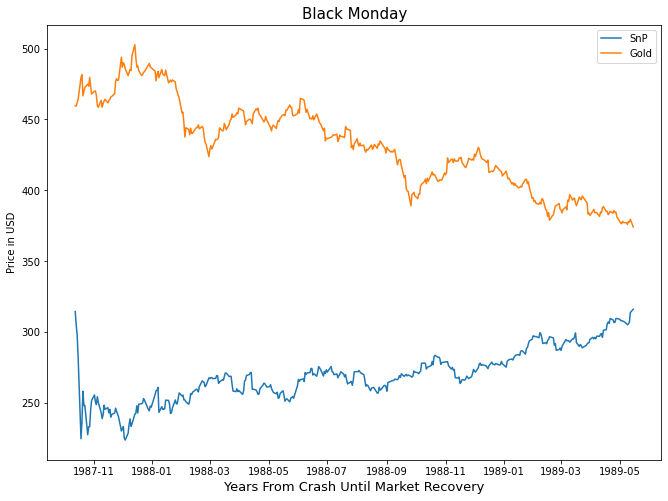

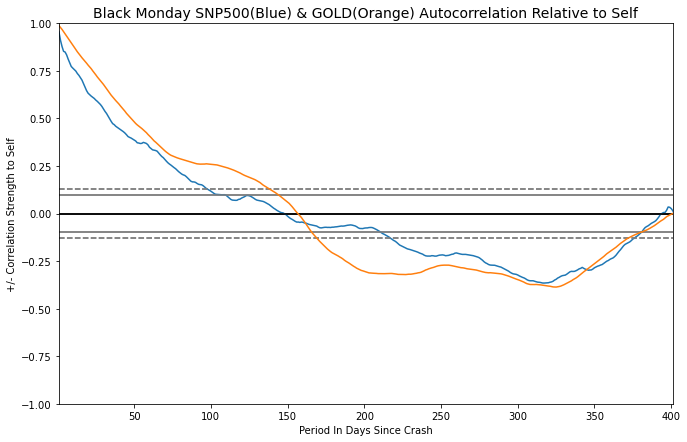

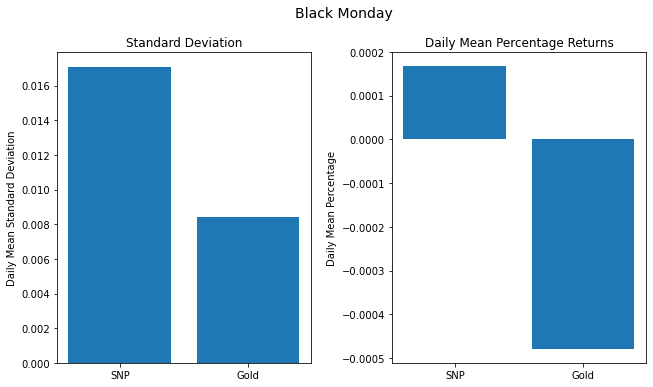

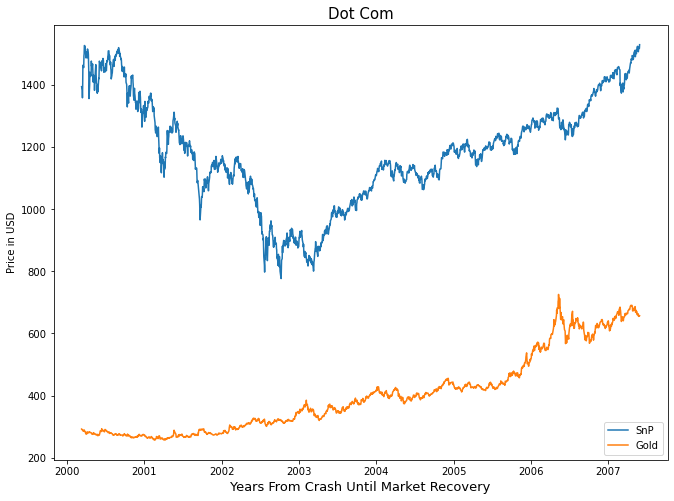

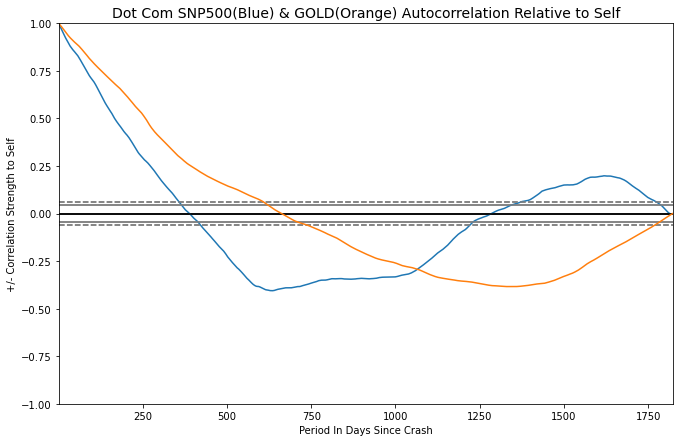

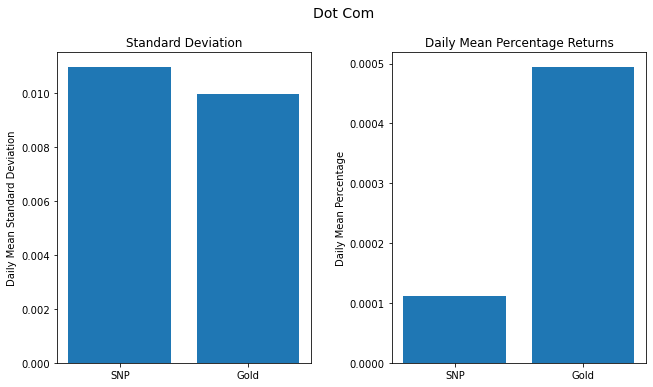

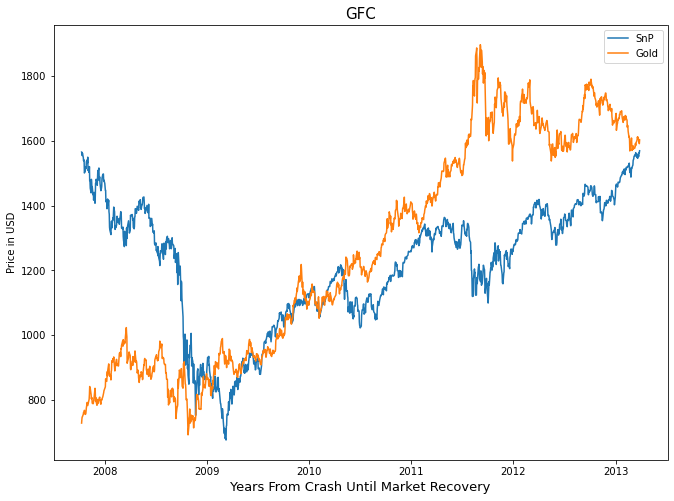

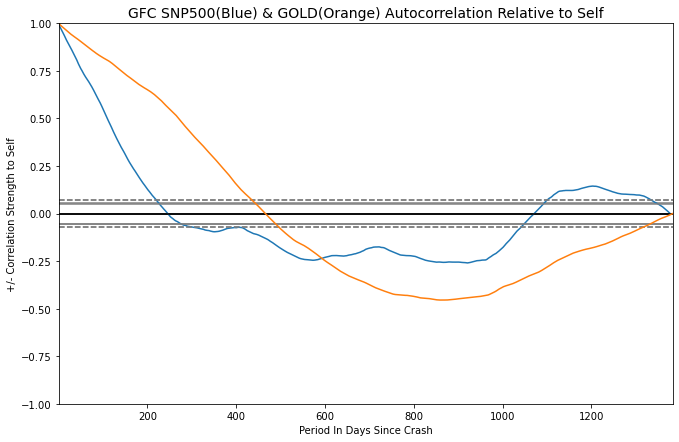

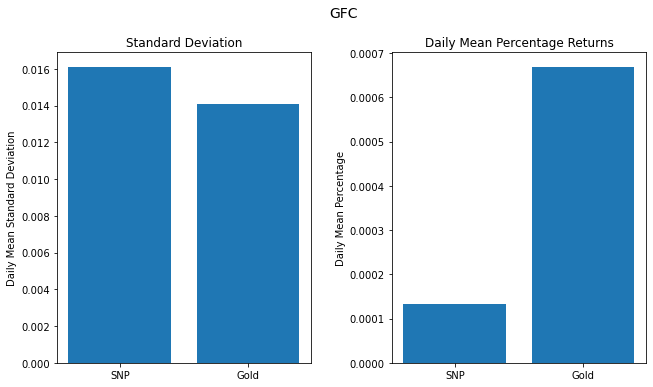

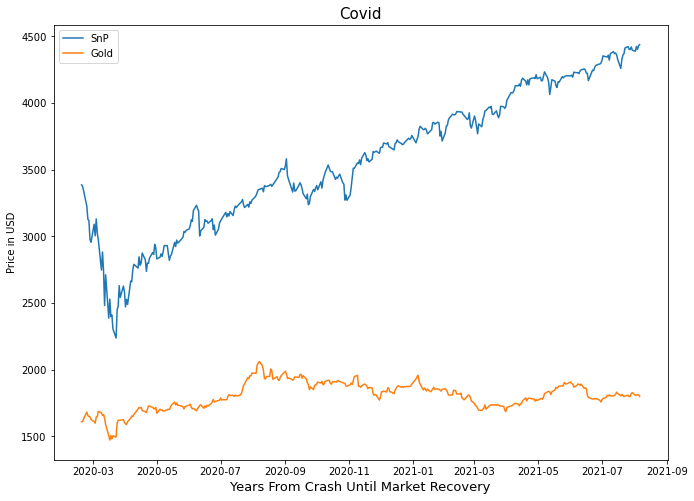

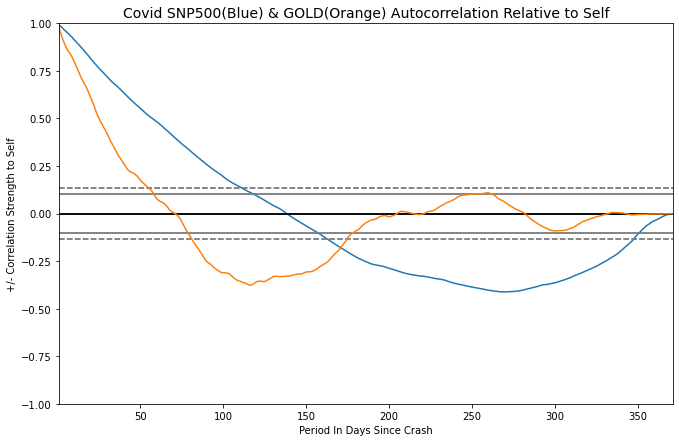

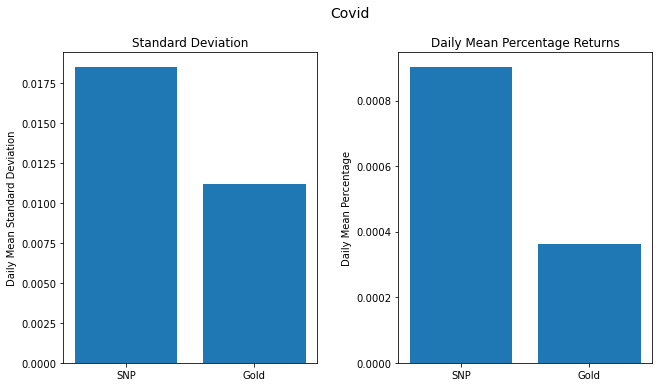

In [246]:
for s, g, t in zip(snp_500_crash_list, gold_crash_list, titles):
    
    f, ax = plt.subplots(figsize=(11,8))
    plt.plot(s)
    plt.plot(g)
    plt.title(f'{t}', fontsize=15)
    plt.legend(['SnP', 'Gold'])
    plt.ylabel('Price in USD', fontsize=10)
    plt.xlabel('Years From Crash Until Market Recovery', fontsize=13)
    
    auto_corr(s, g, t )
    
    daily_ror(s, g, t)